In [1]:
import py21cmcast as p21c
import numpy as np 
from enum import Enum

from astropy import units

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

%load_ext autoreload
%autoreload 2

/home/users/g/f/gfacchin/exo21cmFAST_release/exo21cmFAST/src/py21cmfast/_cfg.py:57: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/home/users/g/f/gfacchin/exo21cmFAST_release/exo21cmFAST/src/py21cmfast/_cfg.py:41: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


### Prepare configuration files for different decay rates and masses

In [18]:
#configuration_file = "../config/constraint_nobkr_elec_large_LX.config"
#p21c.init_runs_from_fiducial(configuration_file, clean_existing_dir=False)

class Primary(Enum):
    ELECTRON = 1
    PHOTON   = 2

primary_model = Primary.ELECTRON

gamma_array  = [1e-35, 1e-34, 1e-33, 1e-32, 1e-31, 1e-30, 1e-29, 1e-28, 1e-27, 1e-26, 1e-25, 1e-24]

if primary_model == Primary.ELECTRON : 
    l10_mass_str_arr = ['6.25', '6.5', '6.75', '7.0', '7.25', '7.5', '7.75', '8.0', '8.25', '8.5', '8.75', '9.0', '9.25', '9.5', '10.0', '10.25','10.5', '10.75', '11.0', '11.25', '11.5', '11.75', '12.0']
    l10_mass_arr = [np.float(l10_mass_str) for l10_mass_str in  l10_mass_str_arr]
    primary = ['elec_delta' if l10_mass <= np.log10(5e+9) else 'e' for l10_mass in l10_mass_arr]

if primary_model == Primary.PHOTON : 
    l10_mass_str_arr = ['2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0', '5.5', '6.0', '6.5', '7.0', '7.5', '8.0', '8.5', '9.0', '9.5', '10.0', '10.5', '11.0', '11.5', '12.0']
    l10_mass_arr = [np.float(l10_mass_str) for l10_mass_str in  l10_mass_str_arr]
    primary = ['phot_delta' if l10_mass <= np.log10(5e+9) else 'gamma' for l10_mass in l10_mass_arr]

#for im, l10_mass in enumerate(l10_mass_arr):
#    p21c.make_config_one_varying_param(configuration_file, 'DM_DECAY_RATE', gamma_array , mod_astro_params = {'DM_LOG10_MASS' : l10_mass},  mod_flag_options = {'DM_PRIMARY' : primary[im]}, add_file_name= 'm' + l10_mass_str_arr[im])

 py21cmcast/340305244.py:14: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations (DeprecationWarning)


In [2]:
z_bins, z_centers, k_bins = p21c.define_grid_modes_redshifts(6., 8 * units.MHz, z_max = 22, k_min = 0.1 / units.Mpc, k_max = 1 / units.Mpc)
print("The redshift bin edges are:", z_bins)
print("The mode bin edges are:", k_bins)

fiducial = p21c.Fiducial("/scratch/ulb/physth_fi/gfacchin/runs_21cmCAST/runs/CONSTRAINT_NOBKR_ELECTRON_LARGE_LX", z_bins, z_centers, k_bins, False, load=True)
fiducial.observation = 'HERA'

The redshift bin edges are: [ 6.          6.28730456  6.5992025   6.93899281  7.31059216  7.71868653
  8.16892985  8.66820756  9.22499121  9.84982306 10.55599    11.36047883
 12.28536057 13.35984643 14.62342929 16.13084378 17.96020444 20.22698157]
The mode bin edges are: [0.1        0.15329426 0.20658851 0.25988277 0.31317703 0.36647129
 0.41976554 0.4730598  0.52635406 0.57964831 0.63294257 0.68623683
 0.73953109 0.79282534 0.8461196  0.89941386 0.95270811] 1 / Mpc


In [3]:
parameters = ['F_STAR10', 'ALPHA_STAR', 'F_ESC10', 'ALPHA_ESC',  'M_TURN', 't_STAR', 'L_X', 'NU_X_THRESH']
#parameters = ['F_STAR10', 'F_STAR7_MINI', 'ALPHA_STAR', 'ALPHA_STAR_MINI',  't_STAR', 'F_ESC10', 'F_ESC7_MINI', 'ALPHA_ESC', 'L_X', 'L_X_MINI', 'NU_X_THRESH']

params = [None] * len(parameters)

for iname, name in enumerate(parameters) :  
    params[iname] = p21c.Parameter(fiducial=fiducial, name=name, verbose = False, plot = False, load=True)

Treating parameter F_STAR10
Treating parameter ALPHA_STAR
Treating parameter F_ESC10
Treating parameter ALPHA_ESC
Treating parameter M_TURN
Treating parameter t_STAR
Treating parameter L_X
Treating parameter NU_X_THRESH


In [19]:
extra_params = np.full(shape=(len(l10_mass_arr), len(gamma_array)), fill_value=None)

for im, l10_mass_str in enumerate(l10_mass_str_arr): 
    for ig, gamma in enumerate(gamma_array):    
        try: 
            extra_params[im, ig] = p21c.Parameter(fiducial=fiducial, name='DM_DECAY_RATE', verbose = False, plot=False, load=True, add_name = 'm' + l10_mass_str, values = gamma)
        except IndexError:
            extra_params[im, ig] = None        

Treating parameter DM_DECAY_RATE (m6.25)
Treating parameter DM_DECAY_RATE (m6.25)
Treating parameter DM_DECAY_RATE (m6.25)
Treating parameter DM_DECAY_RATE (m6.25)
Treating parameter DM_DECAY_RATE (m6.25)
Treating parameter DM_DECAY_RATE (m6.25)
Treating parameter DM_DECAY_RATE (m6.25)
Treating parameter DM_DECAY_RATE (m6.25)
Treating parameter DM_DECAY_RATE (m6.25)
Treating parameter DM_DECAY_RATE (m6.25)
Treating parameter DM_DECAY_RATE (m6.25)
Treating parameter DM_DECAY_RATE (m6.25)
Treating parameter DM_DECAY_RATE (m6.5)
Treating parameter DM_DECAY_RATE (m6.5)
Treating parameter DM_DECAY_RATE (m6.5)
Treating parameter DM_DECAY_RATE (m6.5)
Treating parameter DM_DECAY_RATE (m6.5)
Treating parameter DM_DECAY_RATE (m6.5)
Treating parameter DM_DECAY_RATE (m6.5)
Treating parameter DM_DECAY_RATE (m6.5)
Treating parameter DM_DECAY_RATE (m6.5)
Treating parameter DM_DECAY_RATE (m6.5)
Treating parameter DM_DECAY_RATE (m6.5)
Treating parameter DM_DECAY_RATE (m6.5)
Treating parameter DM_DECAY_

KeyboardInterrupt: 

In [7]:
fiducial.frac_noise = 0.2

sigma_gamma  = np.zeros(shape=(len(l10_mass_arr), len(gamma_array)))

for im, l10_mass_str in enumerate(l10_mass_str_arr): 
    for ig, gamma in enumerate(gamma_array) : 
        if extra_params[im, ig] is not None:
            fisher_matrix     = p21c.evaluate_fisher_matrix([*params, extra_params[im, ig]])
            covariance_matrix = np.linalg.inv(fisher_matrix['matrix'])
            sigma_gamma[im, ig] = np.sqrt(covariance_matrix[-1][-1])

sigma_gamma[sigma_gamma == 0] = np.nan

(1e-30, 1e-24)

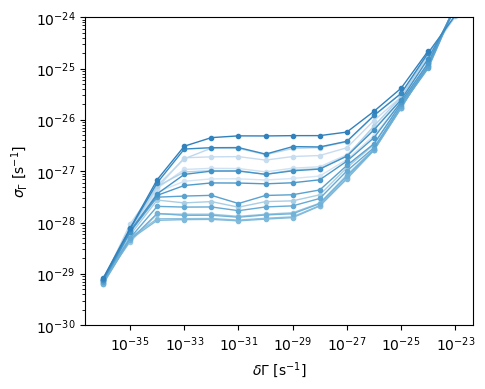

In [9]:
%matplotlib inline

import matplotlib
cmap = matplotlib.cm.get_cmap('Blues')


N = len(l10_mass_str_arr)
color = [cmap((i+5)/(N+6)) for i in range(0, N+1)]

fig, ax = p21c.prepare_plot(ylog=True, xlog=True, xlabel=r'$\delta \Gamma ~ [{\rm s^{-1}}]$', ylabel=r'$\sigma_\Gamma ~ [{\rm s^{-1}}]$')
for im, l10_mass_str in enumerate(l10_mass_str_arr): 
    ax.plot(gamma_array, sigma_gamma[im, :], marker='o', linestyle = '-', color=color[im], linewidth=1, markersize=3)

#ax.plot(gamma_arr, sigma_gamma[-5, :], marker='o', linestyle = '-', color=color[im], linewidth=1, markersize=3) 
ax.set_ylim([1e-30, 1e-24])

#fig.savefig('/home/ulb/physth_fi/gfacchin/exo21cmFAST_release/21cmCAST/scripts/figures_paper/constraint_vs_derivative_step.pdf', bbox_inches='tight')


In [13]:
1/(2*sigma_gamma[:, 7])

array([6.91769529e+26, 4.35646984e+26, 2.58600161e+26, 1.80225792e+26,
       4.73567352e+26, 1.88683480e+27, 3.21886429e+27, 3.86887186e+27,
       4.00728886e+27, 3.36738682e+27, 2.36388822e+27, 1.43577547e+27,
       8.38325454e+26, 4.90665417e+26, 1.65686084e+26, 1.01283247e+26,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan])

In [2]:
#l10_mass_str_arr = ['2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0', '5.5', '6.0', '6.5', '7.0', '7.5', '8.0', '8.5', '9.0', '9.5', '10.0', '10.5', '11.0', '11.5', '12.0']
l10_mass_str_arr = ['2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0', '11.0', '12.0']
l10_mass_arr = [np.float(l10_mass_str) for l10_mass_str in  l10_mass_str_arr]
#gamma_array  = [1e-36, 1e-35, 1e-34, 1e-33, 1e-32, 1e-31, 1e-30, 1e-29, 1e-28, 1e-27, 1e-26, 1e-25, 1e-24, 1e-23]
gamma_array   = [1e-27]

#for im, l10_mass in enumerate(l10_mass_arr):
    #primary = 'phot_delta' if l10_mass <= np.log10(5e+9) else 'gamma'
    #p21c.make_config_one_varying_param("../config/constraint_bkr_minihalos.config", 'DM_DECAY_RATE', gamma_array , mod_astro_params = {'DM_LOG10_MASS' : l10_mass},  mod_flag_options = {'DM_PRIMARY' : primary}, add_file_name= 'm' + l10_mass_str_arr[im])

 py21cmcast/1684481302.py:3: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations (DeprecationWarning)


0.12664712854871557
[1e-28, 1e-27, 1e-26] 7.0


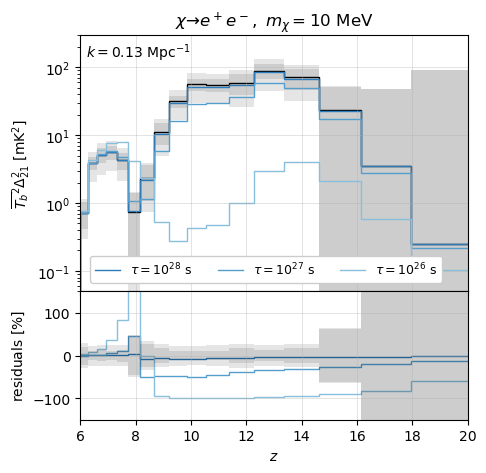

In [69]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False

#plt.rcParams.update({ "text.usetex": True, "font.family": "sans-serif", "font.sans-serif": ["Helvetica"]})

fig, (ax1, ax2) = p21c.prepare_2subplots(ylog_1=True, ylog_2=False, xlog=False, xlabel=r'$z$', ylabel_1=r'$\overline{T_b}^2 \Delta_{21}^2~{\rm [mK^2]}$', 
                                        ylabel_2=r'$\rm residuals~{\rm [\%]}$', ylim_1=[5e-2, 3e+2], xlim=[6, 20], ylim_2 = [-150, 150],
                                        gridspec_kw={'height_ratios': [2, 1],'hspace': 0}, figsize=(5, 5))

z_bins   = fiducial.z_bins
z_arr    = fiducial.z_array
ps_fid   = np.array([ps[0] for ps in fiducial.power_spectrum])
ps_exp_noise = np.array([noise[0] for noise in fiducial.ps_exp_noise])
ps_poi_noise = np.array([noise[0] for noise in fiducial.ps_poisson_noise])
ps_noise     = np.sqrt(ps_exp_noise**2 + ps_poi_noise**2 + (ps_fid*0.20)**2)

print(fiducial.k_array[0])

ax1.stairs(ps_fid, edges=z_bins, color='k', linestyle='-')
ax1.stairs(ps_fid + 2*ps_noise, edges=z_bins, baseline=ps_fid-2*ps_noise, fill=True, color='k', alpha=0.1)
ax1.stairs(ps_fid + 2*ps_exp_noise, edges=z_bins, baseline=ps_fid-2*ps_exp_noise, fill=True, color='k', alpha=0.1)

index_gamma = [8, 9, 10]
N = len(index_gamma)
gamma_display = [gamma_arr[i] for i in index_gamma]
color = [cmap((i+3)/(N+4)) for i in range(0, N+1)]

print(gamma_display, l10_mass_arr[3])

for i, idg in enumerate(index_gamma):
    ps_decay = np.array([ps[0] for ps in extra_params[3, idg]._runs[0].power_spectrum])
    ax1.stairs(ps_decay, edges=z_bins, color=color[N-i-1], label = r'$\tau = 10^{{{:.0f}}}~{{\rm s}}$'.format(-np.log10(gamma_display[i])))
    ax2.stairs(100*(ps_decay - ps_fid)/ps_fid, edges=z_bins, color=color[N-i-1])

#ax2.axhspan(-2, 2, color='k', alpha=0.2, zorder=0)
ax2.stairs(100*ps_noise/ps_fid, edges=z_bins, baseline=-100*ps_noise/ps_fid, fill=True, color='k', alpha=0.1)
ax2.stairs(100*ps_exp_noise/ps_fid, edges=z_bins, baseline=-100*ps_exp_noise/ps_fid, fill=True, color='k', alpha=0.1)
legend1 = ax1.legend(loc='lower left', bbox_to_anchor=(0.01,0.01), fontsize=9, facecolor="white", fancybox=True, ncol=3)
ax1.set_title(r'$\chi \to e^+e^-, ~ m_\chi = 10 ~{\rm MeV}$')
ax1.text(6.2, 1.4e+2, r'$k = {{{:.2f}}} ~ {{\rm Mpc^{{-1}}}}$'.format(fiducial.k_array[0]))

ax1.grid(True, alpha = 0.5, linewidth=0.5)
ax2.grid(True, alpha = 0.5, linewidth=0.5)
legend1.get_frame().set_alpha(1)


fig.savefig('/home/ulb/physth_fi/gfacchin/exo21cmFAST_release/21cmCAST/scripts/figures_paper/PS_e_m10MeV_vs_z.pdf', bbox_inches='tight')


In [77]:
fiducial_bkr = p21c.Fiducial("/scratch/ulb/physth_fi/gfacchin/runs_21cmCAST/runs/CONSTRAINT_BKR_ELECTRON", z_bins, k_bins, False, load=True)
fiducial_bkr.observation = 'HERA'

fiducial_nobkr = p21c.Fiducial("/scratch/ulb/physth_fi/gfacchin/runs_21cmCAST/runs/CONSTRAINT_NOBKR_ELECTRON", z_bins, k_bins, False, load=True)
fiducial_nobkr.observation = 'HERA'

param_bkr   = p21c.Parameter(fiducial=fiducial_bkr,   name='DM_DECAY_RATE', verbose = False, plot=False, load=True, add_name = 'm8.0', values = 1e-28)
param_nobkr = p21c.Parameter(fiducial=fiducial_nobkr, name='DM_DECAY_RATE', verbose = False, plot=False, load=True, add_name = 'm8.0', values = 1e-28)

Treating parameter DM_DECAY_RATE (m8.0)
Treating parameter DM_DECAY_RATE (m8.0)


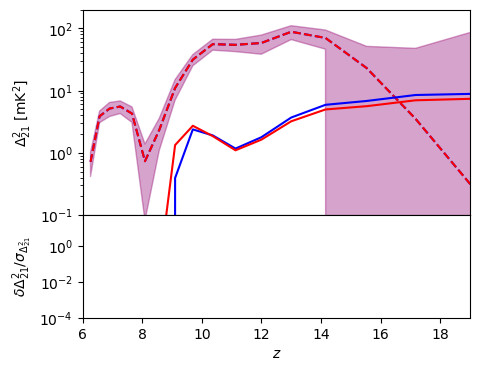

In [73]:
fig, (ax1, ax2) = p21c.prepare_2subplots(ylog_1=True, ylog_2=True, xlog=False, xlabel=r'$z$', ylabel_1=r'$\Delta_{21}^2~{\rm [mK^2]}$', 
                                        ylabel_2=r'$\delta \Delta_{21}^2/\sigma_{\Delta_{21}^2}$', ylim_1=[1e-1, 2e+2], xlim=[6, 19], ylim_2 = [1e-4, 5e+1],
                                        gridspec_kw={'height_ratios': [2, 1],'hspace': 0})

z_arr    = fiducial_nobkr.z_array
ps_fid_nobkr       = np.array([ps[0] for ps in fiducial_nobkr.power_spectrum])
ps_exp_noise_nobkr = np.array([noise[0] for noise in fiducial_nobkr.ps_exp_noise])
ps_fid_bkr         = np.array([ps[0] for ps in fiducial_bkr.power_spectrum])
ps_exp_noise_bkr   = np.array([noise[0] for noise in fiducial_bkr.ps_exp_noise])


ax1.plot(z_arr, ps_fid_nobkr, 'b--')
ax1.plot(z_arr, ps_fid_bkr, 'r--')
ax1.fill_between(z_arr, ps_fid_nobkr - 2*ps_exp_noise_nobkr, ps_fid_nobkr+2*ps_exp_noise_nobkr, color='b', alpha=0.2)
ax1.fill_between(z_arr, ps_fid_bkr - 2*ps_exp_noise_bkr, ps_fid_bkr+2*ps_exp_noise_bkr, color='r', alpha=0.2)

ps_decay_nobkr = np.array([ps[0] for ps in param_nobkr._runs[0].power_spectrum])
ps_decay_bkr = np.array([ps[0] for ps in param_bkr._runs[0].power_spectrum])

ax1.plot(z_arr, ps_decay_nobkr, 'b-')
ax1.plot(z_arr, ps_decay_bkr, 'r-')


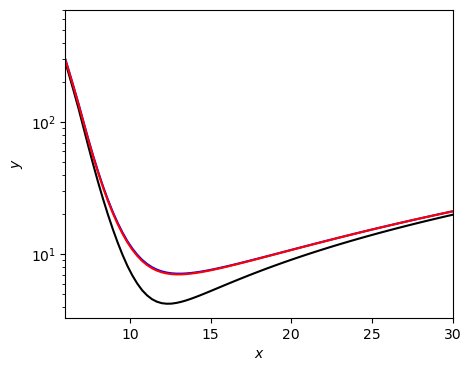

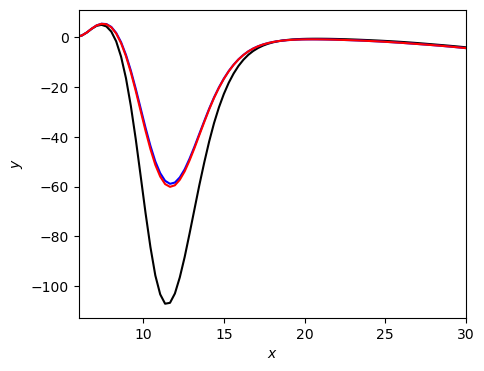

In [78]:
fig1, ax1 = p21c.prepare_plot(rax=True, ylog=True, xlim=[6, 30])

z_glob = fiducial_bkr.z_glob
ax1.plot(z_glob, fiducial.Tk_box, 'k-')
ax1.plot(z_glob, param_bkr._runs[0].Tk_box, 'b-')
ax1.plot(z_glob, param_nobkr._runs[0].Tk_box, 'r-')

fig2, ax2 = p21c.prepare_plot(rax=True, xlim=[6, 30])

ax2.plot(z_glob, fiducial.global_signal, 'k-')
ax2.plot(z_glob, param_bkr._runs[0].global_signal, 'b-')
ax2.plot(z_glob, param_nobkr._runs[0].global_signal, 'r-')